In [922]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib import animation, rc

In [923]:
url="http://localhost:3030/iot"  
df=pd.read_json(url)

In [924]:
df

,_id,date,accelerometerx,accelerometery,accelerometerz,gyroscopex,gyroscopey,gyroscopez,magneticx,magneticy,magneticz,__v
0,61ab5a1e977765f762a610a3,2021-12-04 21:07:58.359,-0.02,-0.46,-0.46,0.92,0.61,1.59,11.74,50.77,-1.51,0
1,61ab5a1e977765f762a610a5,2021-12-04 21:07:58.868,-0.02,-0.47,-0.47,0.79,0.55,1.59,12.08,51.56,-2.12,0
2,61ab5a1f977765f762a610a7,2021-12-04 21:07:59.377,-0.02,-0.47,-0.47,0.73,0.61,1.77,11.90,50.63,-1.16,0
3,61ab5a1f977765f762a610a9,2021-12-04 21:07:59.886,-0.02,-0.47,-0.47,0.73,0.61,1.40,12.16,50.94,-2.09,0
4,61ab5a20977765f762a610ab,2021-12-04 21:08:00.395,-0.02,-0.47,-0.47,0.85,0.49,1.28,11.35,51.16,-2.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53247,61b49c0f968f2132d758a768,2021-12-11 21:39:43.558,0.01,0.02,0.96,0.85,0.73,1.59,5.74,-33.79,-22.05,0
53248,61b49c10968f2132d758a76a,2021-12-11 21:39:44.067,0.01,0.02,0.96,0.73,0.61,1.77,6.20,-33.39,-21.94,0
53249,61b49c10968f2132d758a76c,2021-12-11 21:39:44.576,0.01,0.02,0.96,0.67,0.49,1.65,6.58,-33.78,-23.34,0
53250,61b49c11968f2132d758a76e,2021-12-11 21:39:45.085,0.01,0.02,0.96,0.73,0.49,1.71,6.41,-33.25,-21.68,0


In [925]:
df = df.drop(columns="_id")

In [926]:
df.insert(0, 'accelerometera', round(df.loc[:,'accelerometerx':'accelerometerz'].mean(axis=1),2), allow_duplicates=False)
df.insert(0, 'gyroscopea', round(df.loc[:,'gyroscopex':'gyroscopez'].mean(axis=1),2), allow_duplicates=False)
df.insert(0, 'magnetica', round(df.loc[:,'magneticx':'magneticz'].mean(axis=1),2), allow_duplicates=False)

In [927]:
df.head()

,magnetica,gyroscopea,accelerometera,date,accelerometerx,accelerometery,accelerometerz,gyroscopex,gyroscopey,gyroscopez,magneticx,magneticy,magneticz,__v
0,20.33,1.04,-0.31,2021-12-04 21:07:58.359,-0.02,-0.46,-0.46,0.92,0.61,1.59,11.74,50.77,-1.51,0
1,20.51,0.98,-0.32,2021-12-04 21:07:58.868,-0.02,-0.47,-0.47,0.79,0.55,1.59,12.08,51.56,-2.12,0
2,20.46,1.04,-0.32,2021-12-04 21:07:59.377,-0.02,-0.47,-0.47,0.73,0.61,1.77,11.90,50.63,-1.16,0
3,20.34,0.91,-0.32,2021-12-04 21:07:59.886,-0.02,-0.47,-0.47,0.73,0.61,1.40,12.16,50.94,-2.09,0
4,19.89,0.87,-0.32,2021-12-04 21:08:00.395,-0.02,-0.47,-0.47,0.85,0.49,1.28,11.35,51.16,-2.83,0


In [928]:
df.tail()

,magnetica,gyroscopea,accelerometera,date,accelerometerx,accelerometery,accelerometerz,gyroscopex,gyroscopey,gyroscopez,magneticx,magneticy,magneticz,__v
53247,-16.70,1.06,0.33,2021-12-11 21:39:43.558,0.01,0.02,0.96,0.85,0.73,1.59,5.74,-33.79,-22.05,0
53248,-16.38,1.04,0.33,2021-12-11 21:39:44.067,0.01,0.02,0.96,0.73,0.61,1.77,6.20,-33.39,-21.94,0
53249,-16.85,0.94,0.33,2021-12-11 21:39:44.576,0.01,0.02,0.96,0.67,0.49,1.65,6.58,-33.78,-23.34,0
53250,-16.17,0.98,0.33,2021-12-11 21:39:45.085,0.01,0.02,0.96,0.73,0.49,1.71,6.41,-33.25,-21.68,0
53251,-16.82,1.06,0.33,2021-12-11 21:39:45.594,0.01,0.02,0.96,0.85,0.49,1.83,5.75,-33.74,-22.46,0


In [929]:
df.shape, type(df)


((53252, 14), pandas.core.frame.DataFrame)

In [930]:
df['date'][:1],df['date'][-1:]

(0   2021-12-04 21:07:58.359
 Name: date, dtype: datetime64[ns],
 53251   2021-12-11 21:39:45.594
 Name: date, dtype: datetime64[ns])

In [931]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53252 entries, 0 to 53251
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   magnetica       53252 non-null  float64       
 1   gyroscopea      53252 non-null  float64       
 2   accelerometera  53252 non-null  float64       
 3   date            53252 non-null  datetime64[ns]
 4   accelerometerx  53252 non-null  float64       
 5   accelerometery  53252 non-null  float64       
 6   accelerometerz  53252 non-null  float64       
 7   gyroscopex      53252 non-null  float64       
 8   gyroscopey      53252 non-null  float64       
 9   gyroscopez      53252 non-null  float64       
 10  magneticx       53252 non-null  float64       
 11  magneticy       53252 non-null  float64       
 12  magneticz       53252 non-null  float64       
 13  __v             53252 non-null  int64         
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usa

In [932]:
df.describe()

,magnetica,gyroscopea,accelerometera,accelerometerx,accelerometery,accelerometerz,gyroscopex,gyroscopey,gyroscopez,magneticx,magneticy,magneticz,__v
count,53252.000000,53252.000000,53252.000000,53252.000000,53252.000000,53252.000000,53252.000000,53252.000000,53252.000000,53252.000000,53252.000000,53252.000000,53252.0
mean,-1.681197,0.922657,0.074313,-0.007425,-0.021858,0.251509,0.564523,0.484473,1.717223,3.054757,3.320483,-11.418790,0.0
std,13.246422,17.578732,0.239076,0.186204,0.238732,0.513792,31.895707,29.851704,34.681798,6.318886,30.768094,12.721039,0.0
min,-21.130000,-543.440000,-3.240000,-4.000000,-4.000000,-4.000000,-766.170000,-877.320000,-1018.010000,-20.140000,-39.790000,-50.720000,0.0
25%,-16.380000,0.870000,-0.040000,-0.050000,-0.020000,-0.020000,0.610000,0.490000,1.400000,-1.092500,-33.360000,-22.050000,0.0
50%,-3.700000,0.960000,0.010000,-0.040000,0.020000,0.040000,0.790000,0.550000,1.530000,2.280000,2.450000,-14.090000,0.0
75%,6.930000,1.040000,0.330000,0.010000,0.030000,0.960000,0.920000,0.670000,1.650000,7.870000,24.660000,-1.710000,0.0
max,29.910000,342.530000,2.200000,3.560000,4.000000,4.000000,656.430000,1005.800000,814.090000,51.490000,53.100000,38.920000,0.0


In [933]:
df.isnull().sum() 

magnetica         0
gyroscopea        0
accelerometera    0
date              0
accelerometerx    0
accelerometery    0
accelerometerz    0
gyroscopex        0
gyroscopey        0
gyroscopez        0
magneticx         0
magneticy         0
magneticz         0
__v               0
dtype: int64

In [934]:
df.isna().sum()

magnetica         0
gyroscopea        0
accelerometera    0
date              0
accelerometerx    0
accelerometery    0
accelerometerz    0
gyroscopex        0
gyroscopey        0
gyroscopez        0
magneticx         0
magneticy         0
magneticz         0
__v               0
dtype: int64

In [935]:
df=df.fillna(33.3)
df.isna().sum()

magnetica         0
gyroscopea        0
accelerometera    0
date              0
accelerometerx    0
accelerometery    0
accelerometerz    0
gyroscopex        0
gyroscopey        0
gyroscopez        0
magneticx         0
magneticy         0
magneticz         0
__v               0
dtype: int64

In [936]:
cols = ['date', 'accelerometerx', 'accelerometery', 'accelerometerz', 'gyroscopex', 'gyroscopey', 'gyroscopez', 'magneticx','magneticy','magneticz', 'accelerometera', 'gyroscopea', 'magnetica']

In [937]:
iot_data = df[cols]

In [938]:
iot_data.shape

(53252, 13)

In [939]:
iot_data.head()

,date,accelerometerx,accelerometery,accelerometerz,gyroscopex,gyroscopey,gyroscopez,magneticx,magneticy,magneticz,accelerometera,gyroscopea,magnetica
0,2021-12-04 21:07:58.359,-0.02,-0.46,-0.46,0.92,0.61,1.59,11.74,50.77,-1.51,-0.31,1.04,20.33
1,2021-12-04 21:07:58.868,-0.02,-0.47,-0.47,0.79,0.55,1.59,12.08,51.56,-2.12,-0.32,0.98,20.51
2,2021-12-04 21:07:59.377,-0.02,-0.47,-0.47,0.73,0.61,1.77,11.90,50.63,-1.16,-0.32,1.04,20.46
3,2021-12-04 21:07:59.886,-0.02,-0.47,-0.47,0.73,0.61,1.40,12.16,50.94,-2.09,-0.32,0.91,20.34
4,2021-12-04 21:08:00.395,-0.02,-0.47,-0.47,0.85,0.49,1.28,11.35,51.16,-2.83,-0.32,0.87,19.89


In [940]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53252 entries, 0 to 53251
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            53252 non-null  datetime64[ns]
 1   accelerometerx  53252 non-null  float64       
 2   accelerometery  53252 non-null  float64       
 3   accelerometerz  53252 non-null  float64       
 4   gyroscopex      53252 non-null  float64       
 5   gyroscopey      53252 non-null  float64       
 6   gyroscopez      53252 non-null  float64       
 7   magneticx       53252 non-null  float64       
 8   magneticy       53252 non-null  float64       
 9   magneticz       53252 non-null  float64       
 10  accelerometera  53252 non-null  float64       
 11  gyroscopea      53252 non-null  float64       
 12  magnetica       53252 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 5.3 MB


In [941]:
iot_data.isna().sum()

date              0
accelerometerx    0
accelerometery    0
accelerometerz    0
gyroscopex        0
gyroscopey        0
gyroscopez        0
magneticx         0
magneticy         0
magneticz         0
accelerometera    0
gyroscopea        0
magnetica         0
dtype: int64

In [942]:
iot_data.to_csv('iot_nano33_211123_clean.csv')

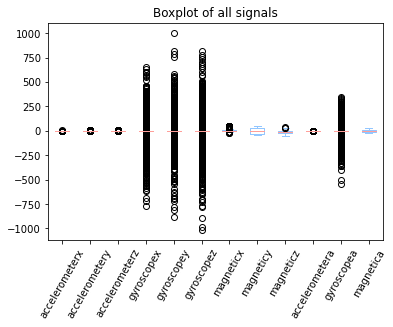

In [943]:
iot_data.iloc[:,1:].plot.box(title='Boxplot of all signals')
plt.xticks(rotation=60)
plt.show()

In [944]:
iot_data.tail()

,date,accelerometerx,accelerometery,accelerometerz,gyroscopex,gyroscopey,gyroscopez,magneticx,magneticy,magneticz,accelerometera,gyroscopea,magnetica
53247,2021-12-11 21:39:43.558,0.01,0.02,0.96,0.85,0.73,1.59,5.74,-33.79,-22.05,0.33,1.06,-16.70
53248,2021-12-11 21:39:44.067,0.01,0.02,0.96,0.73,0.61,1.77,6.20,-33.39,-21.94,0.33,1.04,-16.38
53249,2021-12-11 21:39:44.576,0.01,0.02,0.96,0.67,0.49,1.65,6.58,-33.78,-23.34,0.33,0.94,-16.85
53250,2021-12-11 21:39:45.085,0.01,0.02,0.96,0.73,0.49,1.71,6.41,-33.25,-21.68,0.33,0.98,-16.17
53251,2021-12-11 21:39:45.594,0.01,0.02,0.96,0.85,0.49,1.83,5.75,-33.74,-22.46,0.33,1.06,-16.82


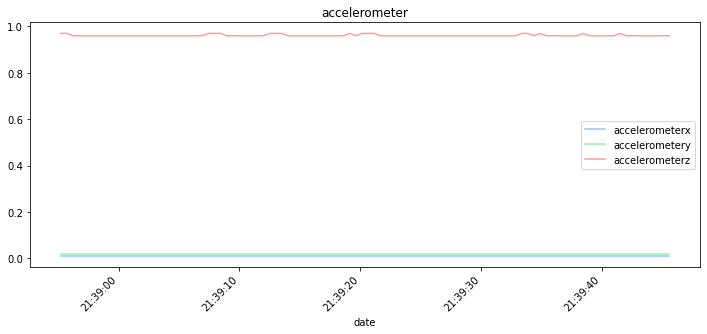

In [945]:
iot_data.tail(100).plot(x='date', y=['accelerometerx','accelerometery','accelerometerz'], figsize=(12,5), title='accelerometer')
plt.xticks(rotation=45)
plt.show()

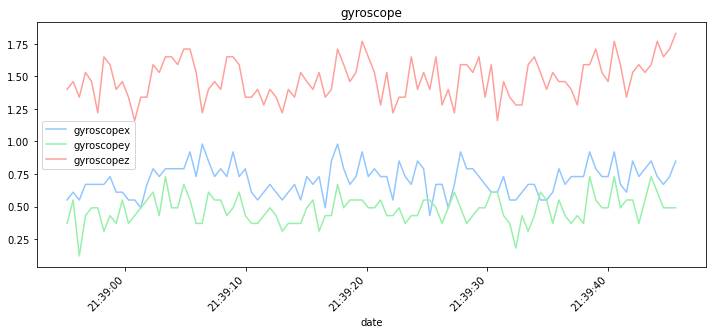

In [946]:
iot_data.tail(100).plot(x='date', y=['gyroscopex','gyroscopey','gyroscopez'], figsize=(12,5), title='gyroscope')
plt.xticks(rotation=45)
plt.show()

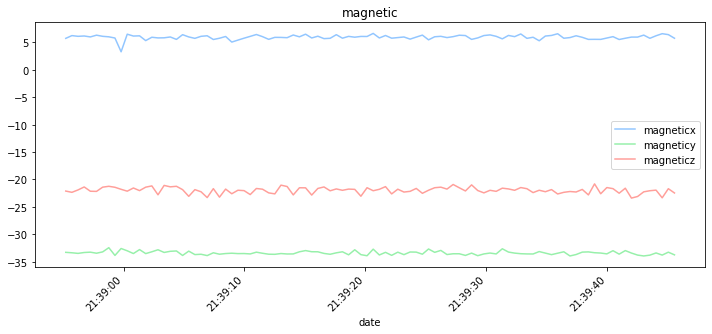

In [947]:
iot_data.tail(100).plot(x='date', y=['magneticx','magneticy','magneticz'], figsize=(12,5), title='magnetic')
plt.xticks(rotation=45)
plt.show()

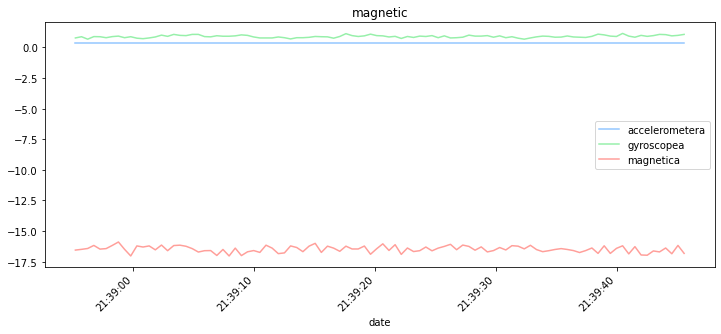

In [948]:
iot_data.tail(100).plot(x='date', y=['accelerometera','gyroscopea','magnetica'], figsize=(12,5), title='magnetic')
plt.xticks(rotation=45)
plt.show()

In [949]:
iot_data[['accelerometera', 'gyroscopea', 'magnetica']].mean()  

accelerometera    0.074313
gyroscopea        0.922657
magnetica        -1.681197
dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'accelerometera'),
  Text(1, 0, 'gyroscopea'),
  Text(2, 0, 'magnetica')])

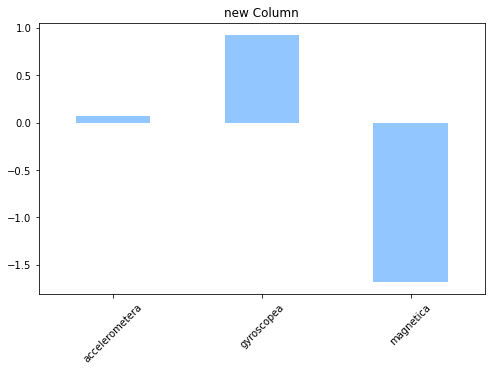

In [950]:
plt.style.use('seaborn-pastel')
iot_data[['accelerometera', 'gyroscopea', 'magnetica']].mean().plot.bar(figsize=(8,5),title= "new Column")
plt.xticks(rotation=45)

In [951]:
df_sq=df[['date','accelerometera', 'gyroscopea', 'magnetica']];df_sq.head()

,date,accelerometera,gyroscopea,magnetica
0,2021-12-04 21:07:58.359,-0.31,1.04,20.33
1,2021-12-04 21:07:58.868,-0.32,0.98,20.51
2,2021-12-04 21:07:59.377,-0.32,1.04,20.46
3,2021-12-04 21:07:59.886,-0.32,0.91,20.34
4,2021-12-04 21:08:00.395,-0.32,0.87,19.89


In [952]:
iot_data.set_index('date',inplace=True)

<AxesSubplot:xlabel='date'>

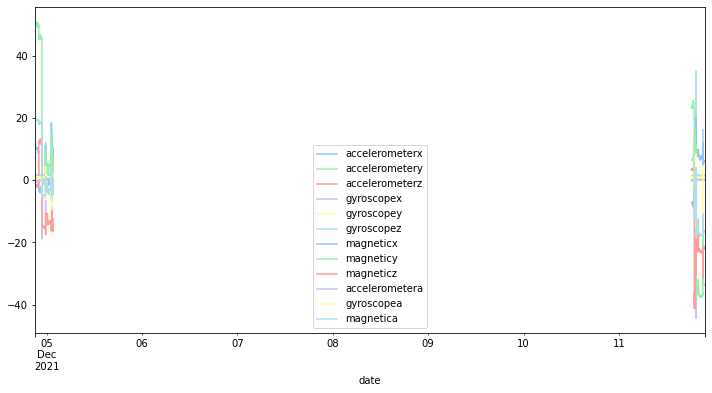

In [953]:
iot_data.resample('60S').mean().plot(figsize=(12,6))

<AxesSubplot:xlabel='date'>

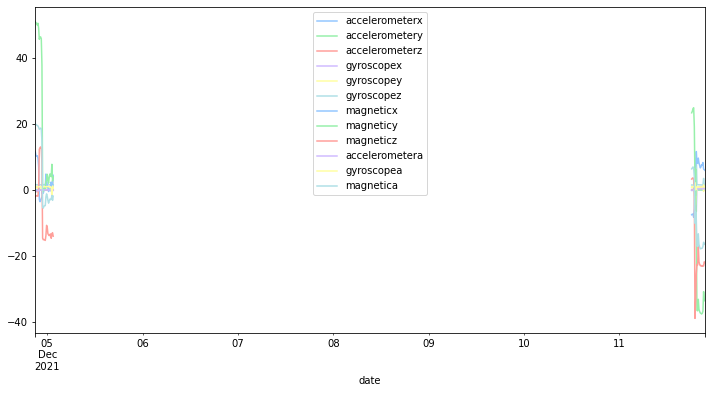

In [954]:
iot_data.resample('600S').mean().plot(figsize=(12,6))

In [955]:
iot_data.resample('H').mean()

,accelerometerx,accelerometery,accelerometerz,gyroscopex,gyroscopey,gyroscopez,magneticx,magneticy,magneticz,accelerometera,gyroscopea,magnetica
date,,,,,,,,,,,,
2021-12-04 21:00:00,-0.022405,-0.445682,-0.445682,0.772568,0.604539,1.540624,9.569170,50.055343,-1.340086,-0.302783,0.973698,19.428149
2021-12-04 22:00:00,-0.065708,-0.012496,-0.012496,0.504897,0.642159,1.505482,-2.472115,36.929670,7.325921,-0.030649,0.884877,13.927819
2021-12-04 23:00:00,-0.048457,0.034172,0.034172,0.697923,0.522217,1.673002,1.473578,1.067176,-14.154593,0.006207,0.965567,-3.871230
2021-12-05 00:00:00,-0.050287,0.039748,0.039748,0.835989,0.577887,1.538887,0.298938,3.719904,-13.091649,0.009766,0.985138,-3.024266
2021-12-05 01:00:00,-0.043713,0.010866,0.010866,-0.095565,0.413596,0.775704,1.701996,4.691530,-13.672742,-0.006961,0.364610,-2.426527
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-11 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-11 18:00:00,-0.120522,-0.016239,-0.016239,0.705939,0.750916,1.557876,-7.156009,23.083539,2.038394,-0.050189,1.005121,5.988566
2021-12-11 19:00:00,0.215535,0.148776,0.727034,-0.039843,-0.017333,3.123756,8.594169,-21.394174,-25.854762,0.364335,1.022709,-12.884947


<AxesSubplot:title={'center':'Hourly change of all sensor data'}, xlabel='date'>

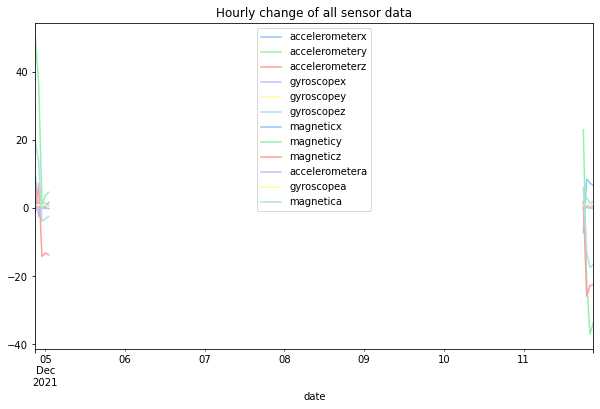

In [956]:
iot_data.resample('H').mean().plot(figsize=(10,6), 
                                   title='Hourly change of all sensor data')

In [957]:
iot_data.resample('D').mean()

,accelerometerx,accelerometery,accelerometerz,gyroscopex,gyroscopey,gyroscopez,magneticx,magneticy,magneticz,accelerometera,gyroscopea,magnetica
date,,,,,,,,,,,,
2021-12-04,-0.046572,-0.128114,-0.128114,0.653062,0.589239,1.574101,2.554790,28.520157,-2.738166,-0.100675,0.939796,9.445611
2021-12-05,-0.047609,0.027983,0.027983,0.456541,0.510966,1.228021,0.870443,4.115675,-13.328344,0.002953,0.732380,-2.780790
2021-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-11,0.045113,0.049574,0.686573,0.534763,0.380168,2.062600,4.474168,-19.270207,-18.222790,0.260672,0.992752,-11.006302


In [958]:
iot_data_day=iot_data.resample('D').mean()
iot_data_day.tail()

,accelerometerx,accelerometery,accelerometerz,gyroscopex,gyroscopey,gyroscopez,magneticx,magneticy,magneticz,accelerometera,gyroscopea,magnetica
date,,,,,,,,,,,,
2021-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-11,0.045113,0.049574,0.686573,0.534763,0.380168,2.0626,4.474168,-19.270207,-18.22279,0.260672,0.992752,-11.006302


In [959]:
iot_rgb = iot_data[['accelerometera', 'gyroscopea', 'magnetica']].resample('D').mean()
iot_rgb.tail()

,accelerometera,gyroscopea,magnetica
date,,,
2021-12-07,NaN,NaN,NaN
2021-12-08,NaN,NaN,NaN
2021-12-09,NaN,NaN,NaN
2021-12-10,NaN,NaN,NaN
2021-12-11,0.260672,0.992752,-11.006302


In [960]:
iot_rgb.iloc[0],iot_rgb.iloc[1]

(accelerometera   -0.100675
 gyroscopea        0.939796
 magnetica         9.445611
 Name: 2021-12-04 00:00:00, dtype: float64,
 accelerometera    0.002953
 gyroscopea        0.732380
 magnetica        -2.780790
 Name: 2021-12-05 00:00:00, dtype: float64)

In [961]:
iot_rgb.index, len(iot_rgb.index)

(DatetimeIndex(['2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
                '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11'],
               dtype='datetime64[ns]', name='date', freq='D'),
 8)

In [962]:
iot_rgb.index[0].strftime('%Y-%m-%d')

'2021-12-04'